In [5]:
import numpy as np
import pandas as pd
import gzip
import nltk
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
%config IPCompleter.greedy=True

In [3]:
#Block 1
# Data source http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Books_5.json.gz
# Loading data into dataframe
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Books_5.json.gz')

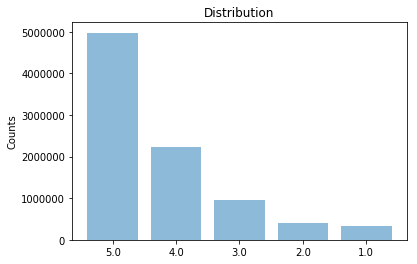

In [22]:
# Rating distribution
df_cnt=df['overall'].value_counts().to_frame()
ratings = df_cnt.index.tolist()
y_pos = np.arange(len(ratings))
counts = df_cnt['overall'] 
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, ratings)
plt.ylabel('Counts')
plt.title('Distribution') 
plt.show()

In [10]:
# As you can see data is very much skewed towards rating 5. So we need to trim down some data for a uniform distribution.
# This does gives an idea as to how much to trim down
df_cnt['samplePct']= df_cnt['overall'].loc[1]/df_cnt['overall']
df_cnt

,overall,samplePct
5.0,4980815,0.065016
4.0,2223094,0.145668
3.0,955189,0.339025
2.0,415110,0.780114
1.0,323833,1.000000


In [11]:
# We will take data from each category equal to the lowest denominator i.e. Rating 1
df_uniform= pd.DataFrame()
for i in range(df_cnt.shape[0]):
    dfx=df[df['overall']==5-i].sample(frac=df_cnt['samplePct'].iloc[i])    
    df_uniform=pd.concat([dfx,df_uniform])    

In [12]:
# Let us now check the distribution
# Ideally, we should have dropped data randomly from each category
df_uniform['overall'].value_counts()

1.0    323833
5.0    323833
4.0    323833
3.0    323833
2.0    323833
Name: overall, dtype: int64

In [13]:
# Categorizing the data into sentiment categories
bins = [1, 3, 4,np.inf]
names = ['Negative', 'Neutral', 'Positive']

df_uniform['sentiment'] = pd.cut(df_uniform['overall'], bins, labels=names, right= False )

In [14]:
# Reseting the index to make it sequentioal
df_uniform=df_uniform.reset_index()
# Saving in a binary format. Which then can be used by next steps
df_uniform.to_pickle("uniform.pkl")